In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('adult.data', delimiter=',')
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
X_labels = dataset.iloc[:, [1,3,4,5,6,7,8,9,13]].values
X_continious = dataset.iloc[:, [0,2,10,11,12]].values
y = dataset.iloc[:, -1].values

In [4]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [5]:
le_X = LabelEncoder()
X_labels = pd.DataFrame(X_labels)
X_labels = X_labels.apply(le_X.fit_transform)

In [6]:
X_labels

,0,1,2,3,4,5,6,7,8
0,7,9,12,4,1,1,4,1,39
1,6,9,12,2,4,0,4,1,39
2,4,11,8,0,6,1,4,1,39
3,4,1,6,2,6,0,2,1,39
4,4,9,12,2,10,5,2,0,5
...,...,...,...,...,...,...,...,...,...
32556,4,7,11,2,13,5,4,0,39
32557,4,11,8,2,7,0,4,1,39
32558,4,11,8,6,1,4,4,0,39
32559,4,11,8,4,1,3,4,1,39


In [7]:
X_labels = X_labels.to_numpy()

In [8]:
X_labels

array([[ 7,  9, 12, ...,  4,  1, 39],
       [ 6,  9, 12, ...,  4,  1, 39],
       [ 4, 11,  8, ...,  4,  1, 39],
       ...,
       [ 4, 11,  8, ...,  4,  0, 39],
       [ 4, 11,  8, ...,  4,  1, 39],
       [ 5, 11,  8, ...,  4,  0, 39]])

In [9]:
X = np.c_[X_continious, X_labels]

In [10]:
X[0]

array([   39, 77516,  2174,     0,    40,     7,     9,    12,     4,
           1,     1,     4,     1,    39], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
results = []

# CART gini

In [13]:
criterion = 'gini'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'CART', 
    'criterion': criterion,
    'accuracy_score': acc
    })

0.8159066482419776


# ID3 C4.5 entropy

In [14]:
criterion = 'entropy'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'C4.5',
    'criterion': criterion,
    'accuracy_score': acc
    })

0.8128358667280823


# Extra Trees Classifier

In [15]:
criterions = ['gini', 'entropy', 'log_loss']
n_estimators_arr = [10, 20, 50, 100, 150]
etc_results = []

for criterion in criterions:
    for n_estimators in n_estimators_arr:
        classifier = ExtraTreesClassifier(criterion=criterion, n_estimators=n_estimators, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        etc_results.append({
            'criterion': criterion,
            'n_estimators': n_estimators, 
            'accuracy_score': accuracy_score(y_test, y_pred)})

result = max(etc_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Extra Trees Classifier'
results.append(result)

0.855366190695532


# Gradient Boosting

In [16]:
loss_arr = ['log_loss']
learning_rate_arr = [0.1, 0.2, 1]
n_estimators_arr = [50, 100, 150] #this param need to change
criterion_arr = ['friedman_mse', 'squared_error']
max_depth_arr = [2, 3, 4]
gb_results = []

for loss in loss_arr:
    for learning_rate in learning_rate_arr:
        for n_estimators in n_estimators_arr:
            for criterion in criterion_arr:
                for max_depth in max_depth_arr:
                    classifier = GradientBoostingClassifier(loss=loss, n_estimators=n_estimators, learning_rate=learning_rate, criterion=criterion, max_depth=max_depth, random_state=1)
                    classifier.fit(X_train, y_train)
                    y_pred = classifier.predict(X_test)
                    gb_results.append({
                        'loss': loss,
                        'learning_rate': learning_rate,
                        'n_estimators': n_estimators,
                        'criterion': criterion,
                        'max_depth': max_depth,
                        'accuracy_score': accuracy_score(y_test, y_pred)
                    })

result = max(gb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Gradient Boosting'
results.append(result)

0.8728696453247351


# Hist Gradient Boosting

In [17]:
learning_rate_arr = [0.1, 0.2, 0.5, 1]
max_iter_arr = [10, 50, 100, 150]
hgb_results = []

for learning_rate in learning_rate_arr:
    for max_iter in max_iter_arr:
        classifier = HistGradientBoostingClassifier(learning_rate=learning_rate, max_iter=max_iter, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        hgb_results.append({
            'learning_rate': learning_rate,
            'max_iter': max_iter,
            'accuracy_score': accuracy_score(y_test, y_pred)
        })

result = max(hgb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Hist Gradient Boosting'
results.append(result)

0.8739444188545985


# Random Forest gini

In [18]:
n_estimators_arr = [10, 20, 50, 100, 150]
criterion_arr = ['gini', 'entropy']
rf_results = []

for n_estimators in n_estimators_arr:
    for criterion in criterion_arr:
        classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        rf_results.append({
            'n_estimators': n_estimators,
            'criterion': criterion,
            'accuracy_score': accuracy_score(y_test, y_pred)
        })

result = max(rf_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Random Forest'
results.append(result)

0.8642714570858283


# Adaboost

In [19]:
n_estimators_arr = [10, 20, 50, 100, 150]
learning_rate_arr = [0.1, 0.2, 0.5, 1]
algorithm_arr = ['SAMME', 'SAMME.R']
ada_results = []

for n_estimators in n_estimators_arr:
    for learning_rate in learning_rate_arr:
        for algorithm in algorithm_arr:
            classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm, random_state=0)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            ada_results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'algorithm': algorithm,
                'accuracy_score': accuracy_score(y_test, y_pred)
            })

result = max(ada_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Adaboost'
results.append(result)

0.8687240902809765


In [20]:
results

[{'classifier': 'CART',
  'criterion': 'gini',
  'accuracy_score': 0.8159066482419776},
 {'classifier': 'C4.5',
  'criterion': 'entropy',
  'accuracy_score': 0.8128358667280823},
 {'criterion': 'entropy',
  'n_estimators': 150,
  'accuracy_score': 0.855366190695532,
  'classifier': 'Extra Trees Classifier'},
 {'loss': 'log_loss',
  'learning_rate': 0.2,
  'n_estimators': 100,
  'criterion': 'squared_error',
  'max_depth': 4,
  'accuracy_score': 0.8728696453247351,
  'classifier': 'Gradient Boosting'},
 {'learning_rate': 0.2,
  'max_iter': 50,
  'accuracy_score': 0.8739444188545985,
  'classifier': 'Hist Gradient Boosting'},
 {'n_estimators': 150,
  'criterion': 'gini',
  'accuracy_score': 0.8642714570858283,
  'classifier': 'Random Forest'},
 {'n_estimators': 150,
  'learning_rate': 1,
  'algorithm': 'SAMME.R',
  'accuracy_score': 0.8687240902809765,
  'classifier': 'Adaboost'}]

               classifier      criterion  accuracy_score  n_estimators   
1                    C4.5        entropy        0.812836           NaN  \
0                    CART           gini        0.815907           NaN   
2  Extra Trees Classifier        entropy        0.855366         150.0   
5           Random Forest           gini        0.864271         150.0   
6                Adaboost            NaN        0.868724         150.0   
3       Gradient Boosting  squared_error        0.872870         100.0   
4  Hist Gradient Boosting            NaN        0.873944           NaN   

       loss  learning_rate  max_depth  max_iter algorithm  
1       NaN            NaN        NaN       NaN       NaN  
0       NaN            NaN        NaN       NaN       NaN  
2       NaN            NaN        NaN       NaN       NaN  
5       NaN            NaN        NaN       NaN       NaN  
6       NaN            1.0        NaN       NaN   SAMME.R  
3  log_loss            0.2        4.0       NaN

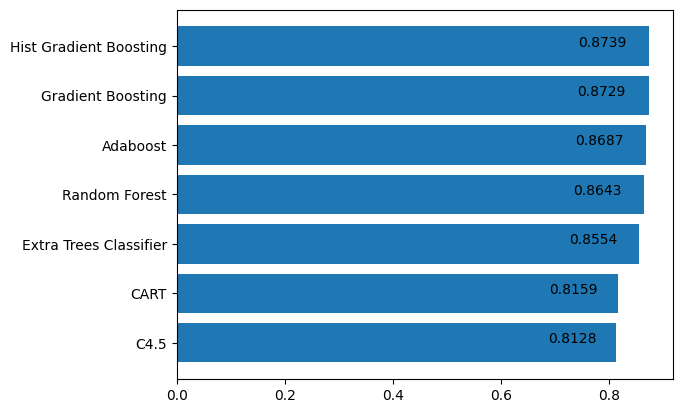

In [21]:
plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame(results)

df_sorted = df.sort_values('accuracy_score')

ax.barh('classifier', 'accuracy_score', data=df_sorted)
for i in range(len(results)):
    ax.text(results[i]['accuracy_score'] * 0.9, results[i]['classifier'], round(results[i]['accuracy_score'], 4), ha='center', color='black')
